In [3]:
import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/david/Documents/mastersCode/ubm/classifiers/gmm_ubm/development', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [14]:
# test for gmm-ubm
from importlib import reload
from audio_datastore.audio_datastore import AudioDatastore
import audio_datastore.audio_datastore as myads
reload(myads)
from collections import Counter
from importlib import reload
from audio_datastore.audio_datastore import AudioDatastore
import os.path
from collections import Counter
import random
from python_speech_features import mfcc
import scipy.io.wavfile as wav
from spafe.utils import vis
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture, _gaussian_mixture
import numpy as np
from scipy.special import logsumexp

In [15]:
datasetFolder = r"/Users/david/Documents/data/speech/google_speech/test"
ads = AudioDatastore()
ads.populate(datasetFolder,include_sub_folders=True, label_source=True)
ads = myads.subset(ads, label='stop')

In [16]:
speakers = []
for file in ads.files:
    nm = os.path.basename(file)
    nm = nm.split('_')[0]
    speakers.append('a' + nm)
ads.set(labels=speakers)

In [17]:
num_speakers_to_enroll = 10
label_count = Counter(ads.labels)
for_enroll_and_test_set = []
for key, cnts in list(label_count.items()):
    if cnts >= 3:
        for_enroll_and_test_set.append(key)
for_enroll = for_enroll_and_test_set[0:num_speakers_to_enroll]
ads_enroll_and_validate = myads.subset(ads, label=for_enroll)
ads_enroll, ads_test = myads.split(ads_enroll_and_validate, 2)

ads_train_ubm = myads.filter(ads, ads_test.files)
ads_train_ubm = myads.filter(ads_train_ubm, ads_enroll.files)

In [27]:
import feature_extraction.mfcc.fe_mfcc as fe_mfcc
import feature_extraction.fe_base as fe_base
import classifiers.classifier_base as classifier_base
import classifiers.gmm_ubm.classifier_gmm_ubm as classifier_gmm_ubm
reload(fe_base)
reload(fe_mfcc)
reload(classifier_base)
reload(classifier_gmm_ubm)

<module 'classifiers.gmm_ubm.classifier_gmm_ubm' from '/Users/david/Documents/mastersCode/ubm/classifiers/gmm_ubm/classifier_gmm_ubm.py'>

training for:  FeatureExtractorMFCC
enrolling for  FeatureExtractorMFCC
testing for  FeatureExtractorMFCC


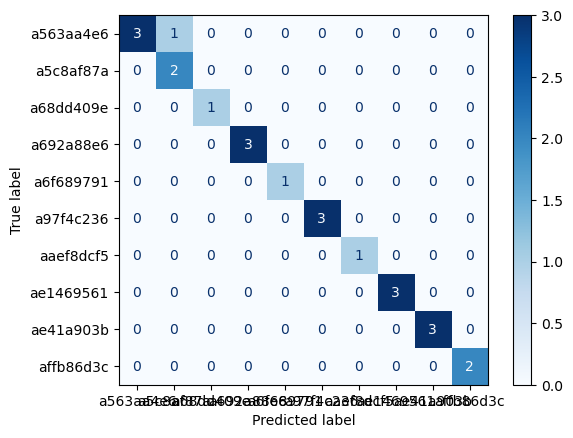

training for:  FeatureExtractorMFCCDelta
enrolling for  FeatureExtractorMFCCDelta
testing for  FeatureExtractorMFCCDelta


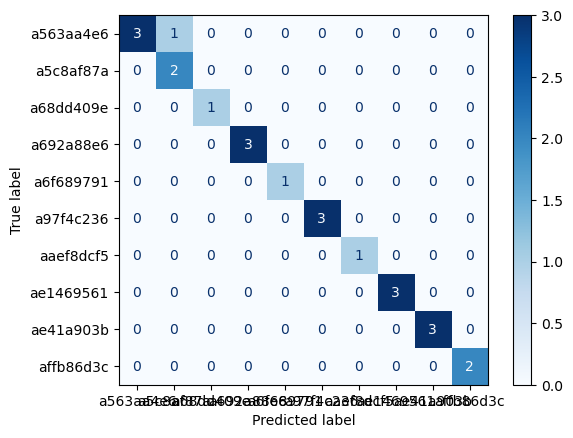

training for:  FeatureExtractorMFCCDeltaDeltas
enrolling for  FeatureExtractorMFCCDeltaDeltas
testing for  FeatureExtractorMFCCDeltaDeltas


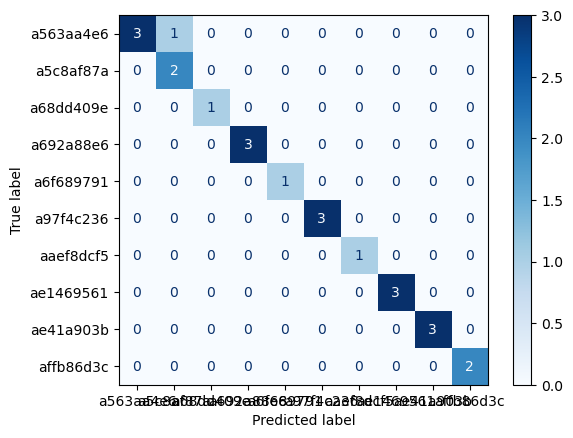

In [30]:
# gfcc's not converging
fe_methods = [
    fe_mfcc.FeatureExtractorMFCC(),
    fe_mfcc.FeatureExtractorMFCCDelta(),
    fe_mfcc.FeatureExtractorMFCCDeltaDeltas(),
    # fe_mfcc.FeatureExtractorGFCC(),
    # fe_mfcc.FeatureExtractorGFCCDelta(),
    # fe_mfcc.FeatureExtractorGFCCDeltaDeltas()
]

classifiers = {}
for fe_method in fe_methods:
    classifier = classifier_gmm_ubm.ClassifierGMMUBM(fe_method)
    classifier.get_normalisation(ads)
    classifier.train(ads_train_ubm)
    classifier.enroll(ads_enroll)
    classifier.test(ads_test)
    classifiers[fe_method.__str__()] = classifier

In [26]:
classifier_test = classifiers['FeatureExtractorMFCC']
classifier_test.test(ads_test)

testing for  FeatureExtractorMFCC


KeyboardInterrupt: 

In [ ]:
classifier